# INFSCI 1040 Spring 2020

## Homework 03

#### Assigned 02/28/2020

#### DUE: 03/25/2020 at 9:00PM

## HANYU ZENG

In this assignment you will perform cluster analysis with Kmeans and Hierarchical clustering. You will also execute a Monte Carlo simulation to calculate the probability of teams winning in the March Madness tournament. In the last problem, you will use cross-validation to tune a logistic regression model which uses the elastic net penalty term to regularize the parameters.  
You are allowed to add as many code and Markdown cells as you feel are needed.  

The cell below imports libraries, classes, and methods which will be used throughout this assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score

In [3]:
import seaborn as sns

In [4]:
from scipy.stats import binom

In [5]:
from sklearn.linear_model import LogisticRegressionCV

## Problem 01 (30 points)

A data set is loaded in the cell below for you. Information about that data set is printed to the screen to reveal that there are 5 continuous variables.  

In [6]:
url_01 = 'https://raw.githubusercontent.com/jyurko/INFSCI_1040_Spring_2020/master/hw_data/hw_03/hw_03_prob_01.csv'
prob_01_df = pd.read_csv(url_01)

print( prob_01_df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
x01    155 non-null float64
x02    155 non-null float64
x03    155 non-null float64
x04    155 non-null float64
x05    155 non-null float64
dtypes: float64(5)
memory usage: 6.2 KB
None


### 1a)
Perform Kmeans clustering on the data set using 2 clusters. Use `sns.pairplot` to create a plot matrix between all 5 variables. Set the `hue` of the markers in the pairs plot to be the cluster assignments.

In [7]:
#check if the data has empty values if so we'll fill it in
print(prob_01_df.isna().sum())

x01    0
x02    0
x03    0
x04    0
x05    0
dtype: int64


In [8]:
prob_01_df.head()

,x01,x02,x03,x04,x05
0,1.654353,-1.524458,-4.213862,2.688760,3.870858
1,1.487265,-3.027381,-1.746127,2.053133,2.877534
2,0.028482,-3.032754,-6.233388,0.989458,4.103607
3,2.771222,0.954415,-2.598247,-1.371769,1.971641
4,-0.057069,2.403601,-3.086499,-2.610555,1.848325


In [9]:
#transform data where distribution will have mean of 0 and sd of 1
sctran = StandardScaler()
sctran.fit(prob_01_df)
sdtf = sctran.transform(prob_01_df)
#convert to dataframe
df1 = pd.DataFrame(sdtf)
df1.head()

,0,1,2,3,4
0,0.156159,-0.176863,-0.689891,0.612308,0.893398
1,0.069987,-0.923385,-0.087089,0.403409,0.608061
2,-0.682350,-0.926054,-1.183207,0.053830,0.960257
3,0.732162,1.054424,-0.295239,-0.722193,0.347838
4,-0.726472,1.774254,-0.414506,-1.129322,0.312415


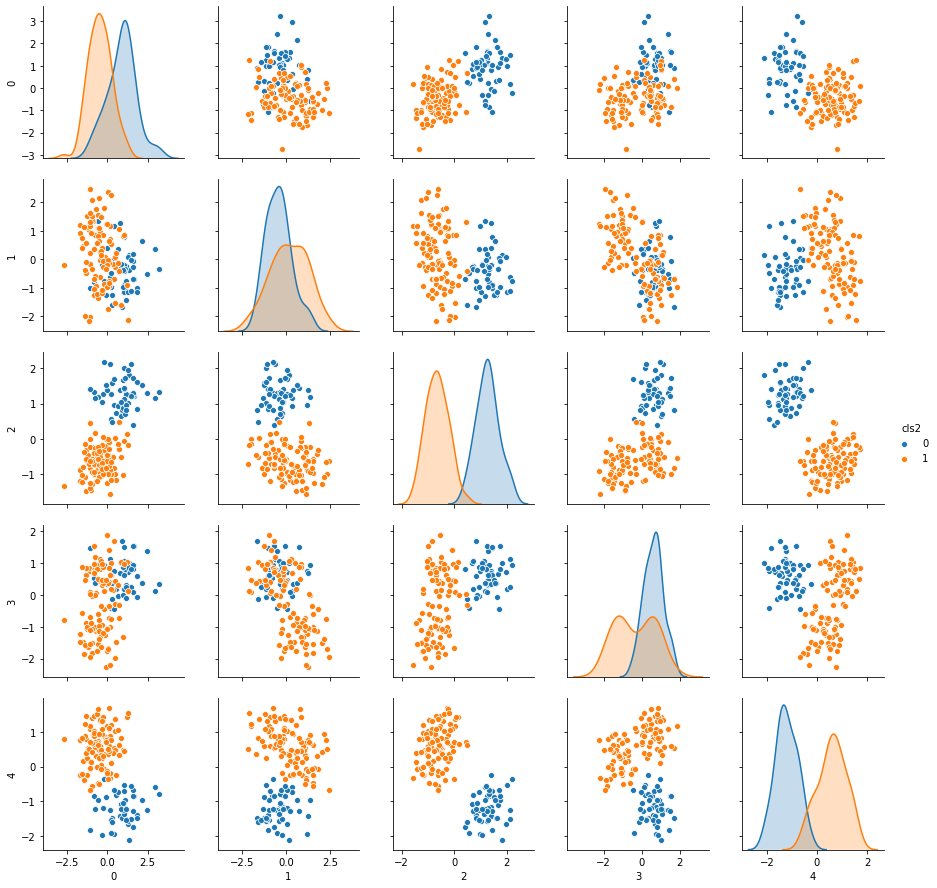

In [10]:
#building Kmeans
kc2 = KMeans(n_clusters = 2)
clus2 = kc2.fit_predict(sdtf)
dfoa = df1.assign(cls2 = clus2)
#pairplot
a1 = sns.pairplot(vars = [0,1,2,3,4], data = dfoa, hue = 'cls2')

### 1b)
Perform Kmeans clustering on the data set using 5 clusters. Use `sns.pairplot` to create a plot matrix between all 5 variables. Set the `hue` of the markers in the pairs plot to be the cluster assignments.

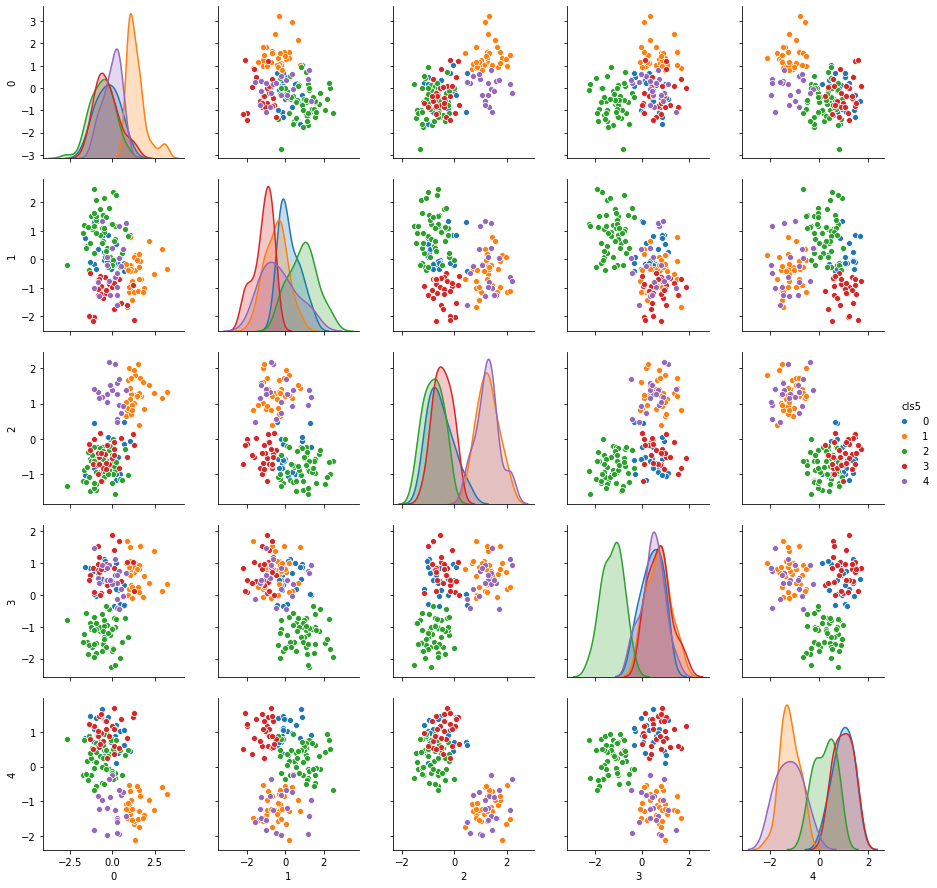

In [11]:
#clustering for 5 variable
kc5 = KMeans(n_clusters = 5)
clus5 = kc5.fit_predict(sdtf)
dfob = df1.assign(cls5 = clus5)
b1 = sns.pairplot(vars = [0,1,2,3,4], data = dfob, hue = 'cls5')

### 1c)
Find the optimal number of Kmeans clusters based on the visual "knee bend" heuristic. Create the "knee bend" plot which plots the total within sum-of-squares with respect to the number of clusters. Try out 1 through 15 clusters.

In [12]:
tots_within = []
k = range(1,16)
for k in k:
    km = KMeans(n_clusters = k)
    km = km.fit(sdtf)
    tots_within.append(km.inertia_)

Text(0, 0.5, 'total within sum of squares')

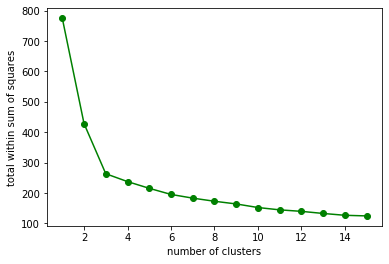

In [13]:
fig, ax = plt.subplots()
#set the range for the x-axis
x = range(1,16)
ax.plot(x,tots_within,'go-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

### 1d)
Find the optimal number of Kmeans clusters based on the silhouette method. Create a plot which shows the silhouette coefficient with respect to the number of clusters. Try out 2 through 15 clusters.

In [14]:
silo_meth = []
i = range(2,16)
for i in i:
    kmd = KMeans(n_clusters = i)
    k_lab= kmd.fit_predict(sdtf)
    silo_meth.append(silhouette_score(sdtf, k_lab))

Text(0, 0.5, 'average silhouette coefficient')

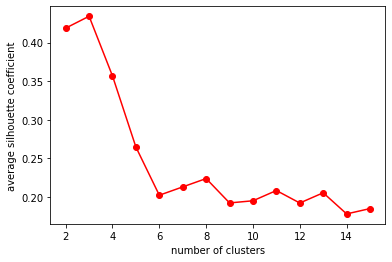

In [15]:
fig, ax = plt.subplots()
x = range(2,16)
ax.plot(x,silo_meth,'ro-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('average silhouette coefficient')

### 1e)
Cluster the data with hierarchical clustering with single, complete, and ward linkages. Create the dendrograms associated with each hierarchical cluster. How do the results compare between the 3 linkages?

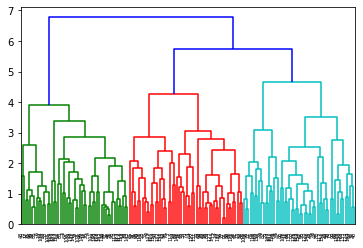

In [16]:
#complete
silo_hier = hierarchy.complete(sdtf)

fig = plt.figure()
dn = hierarchy.dendrogram(silo_hier)
plt.show()

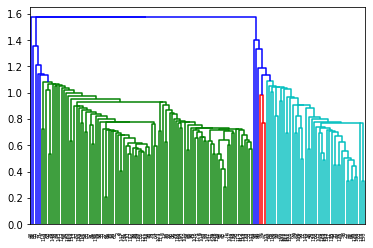

In [17]:
#single
silo_single = hierarchy.single(sdtf)

fig = plt.figure()
dn = hierarchy.dendrogram(silo_single)
plt.show()

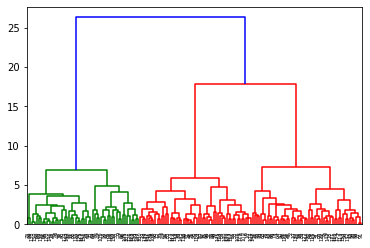

In [18]:
#ward
silo_ward = hierarchy.ward(sdtf)

fig = plt.figure()
dn = hierarchy.dendrogram(silo_ward)
plt.show()

## Problem 02 (40 points)

In this problem you will create a Monte Carlo simulation of 3 games in the NCAA March Madness basketball tournament. In the first round a 3-seed team plays a 14-seed team. The winner of that game plays the winner of a first round game between a 6-seed team and an 11-seed team. The team with the lowest seed is considered more likely to win, than the team with the highest seed.

You will use Monte Carlo simulation to calculate the probability that each of the 4 teams advances beyond the second round. Thus, you will calculate the probability that the 3-seed wins 2 games, the probability that the 14-seed wins 2 games, the probability that 6-seed wins 2 games, and the probability that the 11-seed wins 2 games.  

In a Monte Carlo simulation, you must generate results of simulated games. The results are simply which team wins a game. You must use a particular random number generator to simulate the victor, based an assumed win probability for the lower seeded team. The imported libraries at the beginning of the template provide the hint for which probability distribution you should use.  

You will assume the following win probabilities for each of the possible games that could be played. The variable names in the cell below use the following convention: `prob_<lower>_beats_<higher>`. The variables therefore denote the probability that the lower seeded team will win (or beat) the higher seeded team. As listed below, the probability that the 3-seed beats the 14-seed is 85%, while the probability that the 11-seed beats the 14-seed is 55%. Several of the numbers are based on historical data, and others are just guesses.

In [19]:
prob_3_beats_14 = 0.85
prob_6_beats_11 = 0.64
prob_3_beats_6 = 0.6
prob_3_beats_11 = 0.8
prob_6_beats_14 = 0.7
prob_11_beats_14 = 0.55

### 2a)
Define a function `sim_two_rounds()` which simulates the games in the first two rounds of the tournament. You will need simulate three games in total. The first round game between the 3-seed and the 14-seed, the first round game between the 6-seed and the 11-seed, and the second round game. The teams that play in the second round depend the outcomes of the first round.  

The function is started for you in the cell below. Notice that the returned results are `win_r2_3`, `win_r2_6`, `win_r2_11`, and `win_r2_14`. These variables are intended to be contain a 1 or 0. The number after the second underscore is the team seed, and so the variable names read as "did team win the game in round 2?". Thus, if `win_r2_3 = 1` then the 3-seed team won the round 2 game, while if `win_r2_3 = 0` then the 3-seed team did not win the round 2 game. This structure represents that if `win_r2_6 = 1` then the three other variables will all equal 0.  

Complete the function below. You must simulate who wins each of the first 2 games in round 1. Then you must simulate the second round game, based on the results of the first round.  

In [20]:
### define the function for simulating the 2 rounds
def sim_two_rounds():
    
    # round 1 games
    # simulate if the 3-seed beats the 14-th seed
    win_r1_3 = binom.rvs(n = 1, p = prob_3_beats_14, loc = 0, size = 1)
    # simulate if the 6-seed beats the 11-th seed
    win_r1_6 = binom.rvs(n = 1, p = prob_6_beats_11, loc = 0, size = 1)
    
    # did the lower seeds win round 1?
    if win_r1_3 < 1:
        win_r2_3 = 0
    else:
        win_r2_14 = 0
    
    
    if win_r1_6 < 1:
        win_r2_6 = 0
    else:
        win_r2_11 = 0
    
    
    # round 2 game, depends on what happened in round 1
    if win_r1_3 < 1:
        # 3-seed lost in round 1
        
        # simulate round 2 with the 11th seed
        if win_r1_6 < 1:
            # 6-seed lost round 1, 14th seed plays 11th seed
            win_r2_11 = binom.rvs(n = 1, p = prob_11_beats_14, loc = 0, size = 1)
            win_r2_14 = 1 - win_r2_11
        else:
            # 6-seed won round 1, 14th seed plays 6th seed
            win_r2_11 = 0
            win_r2_6 = binom.rvs(n = 1, p = prob_6_beats_14, loc = 0, size = 1)
            win_r2_14 = 1 - win_r2_6
        
    else:
        # 3-seed won in round 1
        
        # simulate round 2 with the 3rd seed
        if win_r1_6 < 1:
            # 6-seed lost round 1, 3rd seed plays 11th seed
            win_r2_3 = binom.rvs(n = 1, p = prob_3_beats_11, loc = 0, size = 1)
            win_r2_11 = 1 - win_r2_3
        else:
            # 6-seed won round 1, 3rd seed plays 6th seed
            win_r2_11 = 0
            win_r2_3 = binom.rvs(n = 1, p = prob_3_beats_6, loc = 0, size = 1)
            win_r2_6 = 1 - win_r2_3
    
    return win_r2_3, win_r2_6, win_r2_11, win_r2_14
### 

### 2b)
The `run_simulation()` function is given to you below. It takes care of initializing storage of the results and running the simulation the desired number of times, as specified by the `num_runs` argument. Notice that the call to the `sim_two_rounds()` function does not include any input arguments. If you modify `sim_two_rounds()` in Problme 2a) to require input arguments, then you must specify them correctly in the cell below.

In [21]:
def run_simulation(num_runs):
    # initialize storage
    results = np.zeros((num_runs, 4))
    # use a simple for-loop to iterate
    for nid in range(num_runs):
        results[nid, 0], results[nid, 1], results[nid, 2], results[nid, 3] = sim_two_rounds()
    #
    return(results)

Run the simulation 20 times. Be sure to set the random seed with `np.random.seed()`!  
Run the simulation 20 a second time, but change the random seed to a different value.
Print the results to the screen, do they look the same?

In [22]:
np.random.seed(101)
results_20_a = run_simulation(20)

print(results_20_a)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


### 2c)
Calculate the probability that each team advances beyond the second round for each of the two simulations of 20 runs. Are the results consistent between the two simulations?

In [23]:
pd.DataFrame(results_20_a).apply(np.mean, axis=0)

0    0.6
1    0.2
2    0.2
3    0.0
dtype: float64

The probability that each team wins the second round is calculated for the second simulation of 20 runs below. As we can see between the two output displays, the two simulations do not yield the same answers. This makes sense since we are simulating random sequences. Random number generators are used to simulate the game outcomes. We will thus be subject to variation when we use small sample sizes. Clearly 20 runs is not enough to yield consistent and stable estimates for the probabilities.


### 2d)
Run the simulation 20000 times two separate times. Be sure to set the random seed before each simulation. Use separate seeds for each. Calculate the probability that each team advances beyond the second round. Are the results consistent between the two simulations?

In [24]:
np.random.seed(101)
results_20000_a = run_simulation(20000)

np.random.seed(202)
results_20000_b = run_simulation(20000)

The probabilities that each team wins the second round are calculated for the first 20000 run simulation below.

In [25]:
pd.DataFrame(results_20000_a).apply(np.mean, axis=0)

0    0.57300
1    0.28315
2    0.09045
3    0.05340
dtype: float64

The probabilities that each team wins the second round, based on the second 20000 run simulation. Although the numbers are not exactly the same as the first simulation of 20000 runs, they are quite close. Especially for the 3rd and 6th seeds, which have the two highest probabilities of winning the second round. This makes sense since about 57% of the 20000 runs had the 3rd seed winning, so over 10000 counts occured for that event. The 14th seed wins the second round with about 5% probability, so there were only 1000 runs that had the 14th seed win. When we're considering how many samples to use in a simulation, we need to consider what we think the expected event probability will be. The more rare the event is, the more samples will we need to yield stable estimates of the probability.


In [26]:
pd.DataFrame(results_20000_b).apply(np.mean, axis=0)

0    0.57480
1    0.28435
2    0.08860
3    0.05225
dtype: float64

## Problem 03 (30 points)
In this problem, you will fit a logistic regression model with the elastic net penalty to the UCI Sonar data set. The Sonar data set has become a standard data set to use for assessing binary classification model performance. You will use 10-fold cross-validation to tune the tuning parameters of the elastic net penalty.

The cell below reads in the data from the UCI machine learning repository for you and prints the dimensions of the data set to the screen. As you can see, this is a fairly high dimensional problem with 61 variables!

In [158]:
prob_03_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', header=None, prefix='X')

print(prob_03_df.shape)

(208, 61)


The information about the data set is printed for you below. All variables but the last are floating point numbers.  

In [159]:
print(prob_03_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
X0     208 non-null float64
X1     208 non-null float64
X2     208 non-null float64
X3     208 non-null float64
X4     208 non-null float64
X5     208 non-null float64
X6     208 non-null float64
X7     208 non-null float64
X8     208 non-null float64
X9     208 non-null float64
X10    208 non-null float64
X11    208 non-null float64
X12    208 non-null float64
X13    208 non-null float64
X14    208 non-null float64
X15    208 non-null float64
X16    208 non-null float64
X17    208 non-null float64
X18    208 non-null float64
X19    208 non-null float64
X20    208 non-null float64
X21    208 non-null float64
X22    208 non-null float64
X23    208 non-null float64
X24    208 non-null float64
X25    208 non-null float64
X26    208 non-null float64
X27    208 non-null float64
X28    208 non-null float64
X29    208 non-null float64
X30    208 non-null float64
X31    208 non-null float64

In [188]:
prob_03_df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


The last column is the binary outcome we are interested in predicting. The cell below renames the last column to `response` and converts it to a `category` variable. The first few rows of the data set are then printed to the screen for you.

In [160]:
prob_03_df.rename(columns={'X60':'response'}, inplace=True)
prob_03_df.response = prob_03_df.response.astype('category')

prob_03_df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,response
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


The unique levels of the binary outcome are displayed for you below. The response is either `'R'` or `'M'` to denote that the Sonar signal was classified as a Rock or a Metal object. The inputs are features extracted from the Sonar signals.

In [97]:
prob_03_df.response.unique()

[R, M]
Categories (2, object): [R, M]

The cell below creates a figure which summarizes each of the inputs for you with boxplots. This is to show that all inputs are between 0 and 1, but some cover a wider interval than the others.

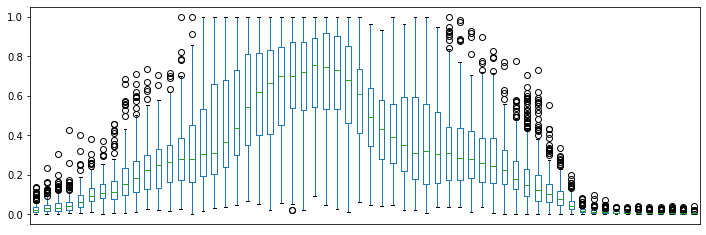

In [98]:
prob_03_df.plot.box(figsize=(12,4), xticks=[])

The cell below extracts the inputs and the response for you, and stores in separate pandas dataframe and series.

In [165]:
X03_df, y_03 = prob_03_df.iloc[:, :-1], prob_03_df.iloc[:, -1]

### 3a)
Rather than using the input features as they are, create the training input set by standardizing the inputs.  

In [180]:
#standarizing the input
xstan = StandardScaler()
xstan.fit(X03_df)
x3anp = xstan.transform(X03_df)

In [182]:
x3adf = pd.DataFrame(x3anp)
x3adf.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,-4.190024e-17,1.663333e-16,-9.661075e-17,1.627971e-16,-1.297039e-16,2.017617e-16,9.607699e-17,1.271019e-17,-3.339343e-16,2.268485e-17,...,3.736327e-18,1.316388e-16,-1.387779e-17,-1.793437e-16,8.433425e-17,-2.199096e-16,4.590345e-17,-7.686159e-17,1.283695e-16,3.149190e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.380641e-01,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-1.810370e-01,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.970293e-01,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,7.039574e+00,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00


# 3b)
The elastic net penalty term to logistic regression consists of two hard to fit tuning parameters. `C` is the "cost" and is the inverse of the regularization penalty parameter. `l1_ratio` is the amount of mixing between the L1 and L2 penalties. Thus, `l1_ratio` is a weighting factor between lasso and ridge penalties. You will use 10-fold cross-validation to tune `C` and `l1_ratio` using the `LogisticRegressionCV` method.  

Rather than allowing `LogisticRegressionCV` to select a default grid of tuning values, you will define a custom grid. Complete the cell below which species the `my_cs` variable to be 51 evenly spaced points between the natural log of 0.001 and the natural log of 3. Because the vector is defined in the log-space, be sure to use the exponential function to convert back to the proper units for `C`. Also define the `my_l1` variable to be 11 evenly spaced points between 0.01 and 0.99.  

In [208]:
my_cs = np.linspace(np.log(0.001), np.log(3), 51, endpoint = True)
my_l1 = np.linspace(0.01, 0.99, 11, endpoint=True)

In [226]:
my_cs = np.exp(my_cs)

### 3c)
Execute the 10-fold cross-validation by setting the `cv` argument to `LogisticRegressionCV` to be equal to 10. Set the `random_state` argument to be 101. You can use the default scoring method which uses the Accuracy. You must specify the `penalty` argument to be `elasticnet` which requires that you specify the `solver` argument to be `saga`. Set the `max_iter` argument to be 5001. Assign your custom tuning search values to the `Cs` and `l1_ratios` arguments.  

Fit the model using the standardized inputs and the binary responses and assign the result to `mod_cv`. Training and performing the necessary cross-validation may take several minutes to complete.

In [191]:
#use label encoder to convert the y_03 categroical data
from sklearn import preprocessing

In [213]:
le = preprocessing.LabelEncoder()
le.fit(y_03)
le.classes_
ley = le.transform(y_03)

In [219]:
x3mat = x3adf.to_numpy()

In [247]:
mod_cv = LogisticRegressionCV(Cs = my_cs,l1_ratios = my_l1,cv = 10,
                              random_state = 101,penalty = 'elasticnet',
                              solver = 'saga',max_iter = 5001).fit(x3mat,ley)

In [245]:
#mod_cv = LogisticRegressionCV(Cs = my_cs,l1_ratios = my_l1,cv = 10,random_state = 101,
#                     penalty = 'elasticnet',solver = 'saga',max_iter = 5001)

### 3d)
The optimal or "best" values for the tuning parameters are contained in the `mod_cv.C_` and `mod_cv.l1_ratio_` attributes. Based on your results, is the "best" elastic net model more like lasso or ridge? Print out the `mod_cv.coef_`, are any set to zero? 

In [248]:
mod_cv.C_

array([0.03976269])

In [249]:
mod_cv.l1_ratio_

array([0.99])

In [250]:
mod_cv.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.34975662, -0.02083743,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03306054,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.06197297,
         0.        ,  0.        ,  0.        , -0.12735172,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

The value for c is low then it's sever penalty the t score is high which is more closely to lasso regression